### Importing Basic Libraries

In [1]:
#importing library for dataset processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data Set

In [2]:
#importing our dataset
df=pd.read_csv('.\\input\\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Data Analysis

In [3]:
#checking if null values are present
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
#checking duplicate rows
df.duplicated().sum()

0

In [5]:
#data set already clean since no null values present

In [6]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
#co-relation of features with one-another
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_columns].corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

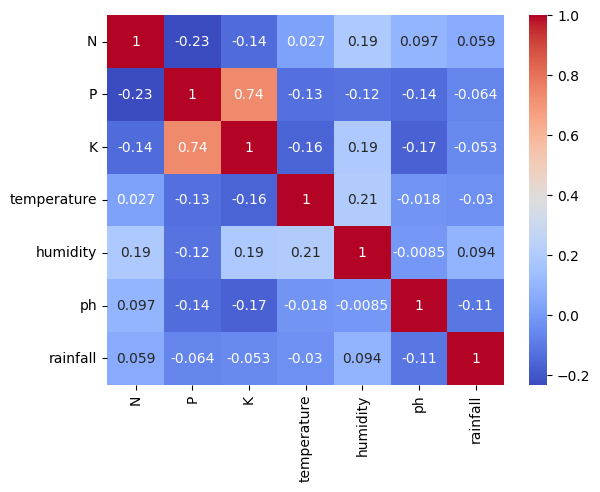

In [8]:
# chart to show co-relation betweem features
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

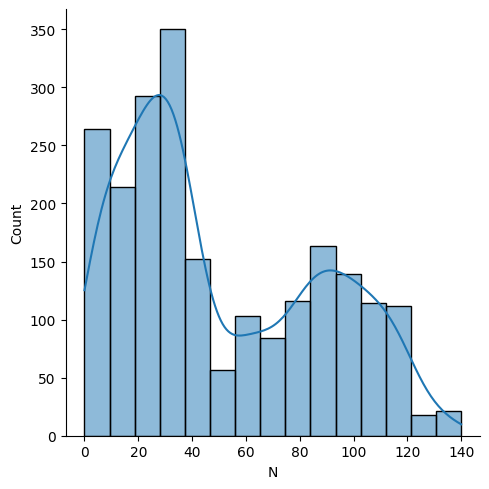

In [9]:
sns.displot(df['N'],kde=True)
plt.show()

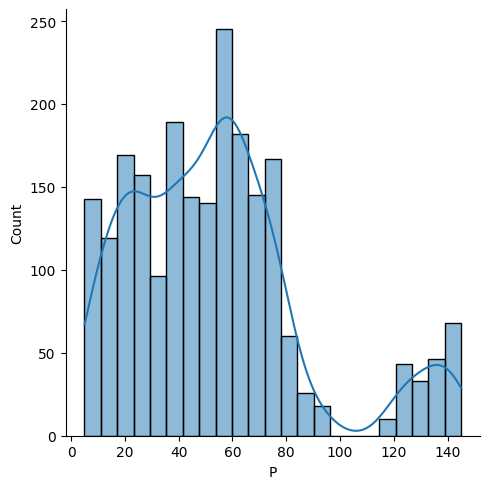

In [10]:
sns.displot(df['P'],kde=True)

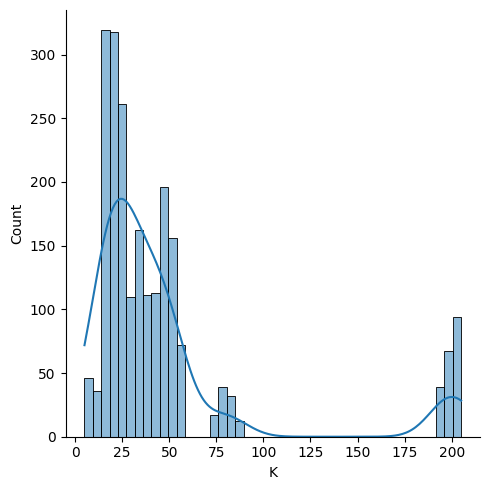

In [11]:
sns.displot(df['K'],kde=True)

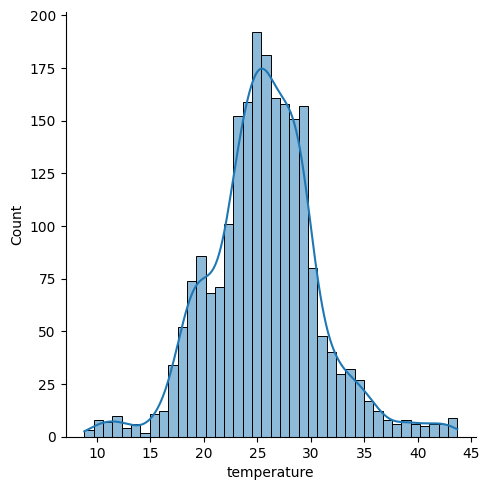

In [12]:
sns.displot(df['temperature'],kde=True)

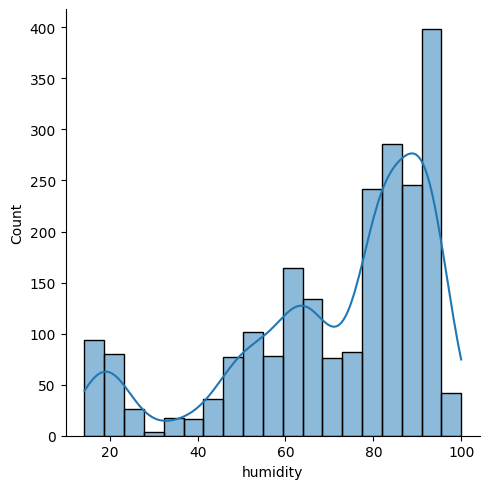

In [13]:
sns.displot(df['humidity'],kde=True)

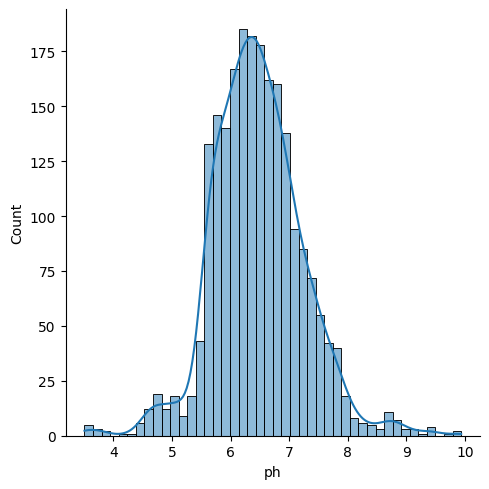

In [14]:
sns.displot(df['ph'],kde=True)

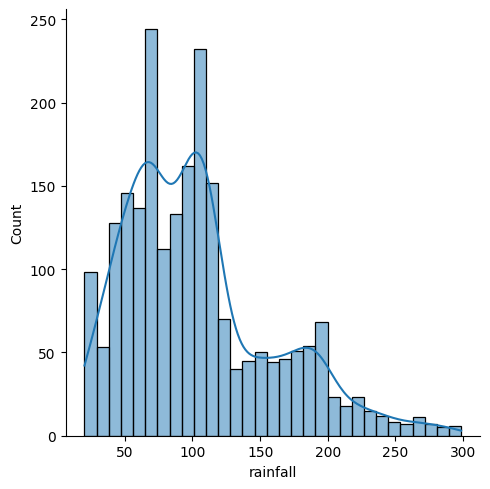

In [15]:
sns.displot(df['rainfall'],kde=True)

In [16]:
# Mean value of features for each crop
df_summary=pd.pivot_table(df,index=['label'],aggfunc='mean')
df_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


### Data Processing

In [17]:
from __future__ import print_function

In [18]:
header = df.columns.tolist()
header

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [19]:
#Convering dataframe to list of list
data=df.values.tolist()
data

[[90,
  42,
  43,
  20.87974371,
  82.00274423,
  6.502985292000001,
  202.9355362,
  'rice'],
 [85, 58, 41, 21.77046169, 80.31964408, 7.038096361, 226.6555374, 'rice'],
 [60, 55, 44, 23.00445915, 82.3207629, 7.840207144, 263.9642476, 'rice'],
 [74, 35, 40, 26.49109635, 80.15836264, 6.980400905, 242.8640342, 'rice'],
 [78, 42, 42, 20.13017482, 81.60487287, 7.628472891, 262.7173405, 'rice'],
 [69, 37, 42, 23.05804872, 83.37011772, 7.073453503, 251.0549998, 'rice'],
 [69, 55, 38, 22.70883798, 82.63941394, 5.70080568, 271.3248604, 'rice'],
 [94,
  53,
  40,
  20.27774362,
  82.89408619,
  5.718627177999999,
  241.9741949,
  'rice'],
 [89,
  54,
  38,
  24.51588066,
  83.53521629999999,
  6.685346424,
  230.4462359,
  'rice'],
 [68, 58, 38, 23.22397386, 83.03322691, 6.336253525, 221.2091958, 'rice'],
 [91, 53, 40, 26.52723513, 81.41753846, 5.386167788, 264.6148697, 'rice'],
 [90, 46, 42, 23.97898217, 81.45061596, 7.50283396, 250.0832336, 'rice'],
 [78, 58, 44, 26.80079604, 80.88684822, 5.1

In [20]:
import random

train_ratio = 0.7
random.shuffle(data)

split_index = int(len(data) * train_ratio)

training_data = data[:split_index]
testing_data = data[split_index:]

In [21]:
training_data

[[36, 140, 198, 23.34386401, 91.47684705, 6.28188384, 104.4267991, 'apple'],
 [12, 66, 20, 27.41434987, 63.41785982, 7.336117221, 44.43177543, 'lentil'],
 [97, 29, 27, 27.74576987, 54.36976075, 7.205078785, 139.8619431, 'coffee'],
 [35, 64, 15, 28.47442276, 63.53604453, 6.500144962, 69.5274407, 'blackgram'],
 [5, 68, 20, 19.04380471, 33.10695144, 6.12166671, 155.3705624, 'pigeonpeas'],
 [20, 41, 20, 29.27308605, 89.4875022, 7.073048264, 50.9246554, 'mungbean'],
 [27,
  72,
  23,
  19.92889503,
  21.79992115,
  5.961934481,
  64.02640797,
  'kidneybeans'],
 [26,
  80,
  83,
  17.08498521,
  16.14565756,
  7.528599957000001,
  71.31007253,
  'chickpea'],
 [39, 127, 202, 15.3246651, 81.67215994, 6.477768039, 71.60102999, 'grapes'],
 [60, 68, 83, 19.12065218, 18.43475844, 6.620900869, 85.52950164, 'chickpea'],
 [20,
  27,
  41,
  20.51343484,
  92.51675903,
  5.700088663,
  110.5764023,
  'pomegranate'],
 [113,
  30,
  50,
  26.03967219,
  83.9862443,
  6.277484042999999,
  43.87712348,
  

In [22]:
testing_data

[[133, 47, 24, 24.40228894, 79.19732001, 7.231324765, 90.8022356, 'cotton'],
 [40,
  73,
  20,
  21.59343016,
  20.31871249,
  5.811314232000001,
  61.13872036,
  'kidneybeans'],
 [99,
  40,
  32,
  24.18471151,
  69.94807345,
  7.0455430560000005,
  163.27087319999995,
  'coffee'],
 [126, 46, 25, 24.43847399, 81.69801729, 6.757457943, 60.79645852, 'cotton'],
 [104,
  18,
  30,
  23.60301571,
  60.39647474,
  6.779832611000002,
  140.9370415,
  'coffee'],
 [37,
  18,
  30,
  27.63551259,
  99.34854917,
  6.38488418,
  157.91715369999997,
  'coconut'],
 [103,
  33,
  25,
  27.10210397,
  55.74973320000001,
  6.911066044,
  139.5013171,
  'coffee'],
 [32,
  56,
  18,
  20.0467711,
  65.84395319,
  7.135251532000001,
  46.05333124,
  'lentil'],
 [30, 120, 200, 38.06099482, 82.24729637, 6.234904253, 65.70148216, 'grapes'],
 [67, 58, 39, 25.2827223, 80.54372813, 5.453592032, 220.1156708, 'rice'],
 [14, 48, 21, 29.24598976, 84.80084105, 6.991242362, 53.43228915, 'mungbean'],
 [20,
  73,
  22

# Decision Tree Classifier

## Overview
Decision tree classifier is a popular machine learning algorithm used for classification tasks. It works by recursively partitioning the feature space into regions, where each region represents a specific class label. This process forms a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a class label.

## How it Works
1. **Tree Construction**: The decision tree classifier starts with the entire dataset as the root node. It then recursively splits the dataset into subsets based on the values of features. The goal is to minimize impurity or maximize information gain at each split.
2. **Node Splitting**: At each node, the algorithm selects the best feature to split the data. It evaluates different splitting criteria, such as Gini impurity or entropy, to determine the optimal split that maximizes the homogeneity of classes in the subsets.
3. **Tree Pruning**: After the tree is constructed, it may be pruned to avoid overfitting. Pruning involves removing nodes that do not provide significant improvement in classification accuracy on the validation set.
4. **Prediction**: To classify a new instance, the algorithm traverses the decision tree from the root node to a leaf node based on the feature values of the instance. The class label associated with the leaf node is then assigned to the instance.

## Parameters
- **Criterion**: The function used to measure the quality of a split. It can be "gini" for Gini impurity or "entropy" for information gain.
- **Max Depth**: The maximum depth of the decision tree. It limits the number of levels in the tree.
- **Min Samples Split**: The minimum number of samples required to split an internal node.
- **Min Samples Leaf**: The minimum number of samples required to be at a leaf node.
- **Max Features**: The maximum number of features to consider when looking for the best split.
- **Class Weight**: Weights associated with classes. It can be used to handle class imbalance.

## Implementation
Decision tree classifiers are implemented in various machine learning libraries, such as scikit-learn in Python, which provides a `DecisionTreeClassifier` class. The implementation involves:
1. Loading the dataset and splitting it into training and testing sets.
2. Creating an instance of the `DecisionTreeClassifier` class with desired parameters.
3. Training the classifier on the training data using the `fit()` method.
4. Evaluating the classifier's performance on the test data using metrics such as accuracy, precision, recall, or F1-score.
5. Optionally, tuning the parameters using techniques like cross-validation or grid search.

## Tuning
1. **Parameter Tuning**: Adjusting parameters such as max depth, min samples split, and min samples leaf to optimize model performance.
2. **Cross-Validation**: Using techniques like k-fold cross-validation to evaluate model performance and select the best set of parameters.
3. **Pruning**: Performing pruning to prevent overfitting and improve generalization.
4. **Feature Selection**: Identifying and selecting the most relevant features to improve model efficiency and accuracy.
5. **Ensemble Methods**: Combining multiple decision trees using ensemble methods like Random Forest or Gradient Boosting for improved performance.


In [23]:
# Convert dataframe to list of list
data = df.values.tolist()

In [ ]:
# Define the parameters
class DecisionTreeParameters:
    def __init__(self, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features

    def get_params(self):
        return {
            "criterion": self.criterion,
            "max_depth": self.max_depth,
            "min_samples_split": self.min_samples_split,
            "min_samples_leaf": self.min_samples_leaf,
            "max_features": self.max_features
        }

In [ ]:
# Function to split data into training and testing sets
def train_test_split(data, train_ratio=0.7):
    random.shuffle(data)
    split_index = int(len(data) * train_ratio)
    training_data = data[:split_index]
    testing_data = data[split_index:]
    return training_data, testing_data

In [ ]:
# Function to find unique values for a column in a dataset
def unique_vals(rows, col):
    return set([row[col] for row in rows])

In [ ]:
# Function to count the number of each type of example in a dataset
def class_counts(rows):
    counts = {}
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [ ]:
# Function to check if a value is numeric
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

In [ ]:
# Define the Question class
class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (header[self.column], condition, str(self.value))

In [ ]:
# Function to partition a dataset
def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [ ]:
# Function to calculate the Gini Impurity for a list of rows
def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl ** 2
    return impurity

In [ ]:
# Function to calculate the entropy for a list of rows
def entropy(rows):
    counts = class_counts(rows)
    entropy_val = 0
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        entropy_val -= prob_of_lbl * np.log2(prob_of_lbl)
    return entropy_val

In [ ]:
# Function to calculate the impurity based on criterion
def impurity(rows, criterion):
    if criterion == "gini":
        return gini(rows)
    elif criterion == "entropy":
        return entropy(rows)
    else:
        raise ValueError("Invalid criterion. Supported criteria are 'gini' and 'entropy'.")

In [ ]:
# Function to calculate the information gain
def info_gain(left, right, current_uncertainty, criterion):
    p = float(len(left)) / (len(left) + len(right))
    left_impurity = impurity(left, criterion)
    right_impurity = impurity(right, criterion)
    return current_uncertainty - p * left_impurity - (1 - p) * right_impurity

In [ ]:
# Function to find the best question to ask by iterating over every feature / value
def find_best_split(rows, params):
    best_gain = 0
    best_question = None
    current_uncertainty = impurity(rows, params.criterion)
    n_features = len(rows[0]) - 1

    if params.max_features is not None:
        if isinstance(params.max_features, int):
            n_features = min(n_features, params.max_features)
        elif params.max_features == 'sqrt':
            n_features = int(np.sqrt(n_features))
        elif params.max_features == 'log2':
            n_features = int(np.log2(n_features))

    for col in range(n_features):
        values = unique_vals(rows, col)
        for val in values:
            question = Question(col, val)
            true_rows, false_rows = partition(rows, question)

            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            gain = info_gain(true_rows, false_rows, current_uncertainty, params.criterion)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [ ]:
# Define the Leaf class
class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [ ]:
# Define the Decision_Node class
class Decision_Node:
    def __init__(self, question, true_branch, false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [ ]:
# Function to build the tree
def build_tree(rows, params, current_depth=0):
    gain, question = find_best_split(rows, params)

    if gain == 0 or (
            params.min_samples_split is not None and len(rows) < params.min_samples_split) or (
            params.max_depth is not None and current_depth >= params.max_depth) or (
            params.min_samples_leaf is not None and len(rows) < 2*params.min_samples_leaf
            ):
        return Leaf(rows)

    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows, params, current_depth + 1)
    false_branch = build_tree(false_rows, params, current_depth + 1)

    return Decision_Node(question, true_branch, false_branch)

In [ ]:
# Function to print the decision tree
def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return

    print(spacing + str(node.question))

    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [ ]:
# Function to classify a data point
def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [ ]:
# Function to print predictions at a leaf
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [24]:
# Function to calculate accuracy
def calculate_accuracy(testing_data, tree):
    correct_predictions = 0
    total_predictions = len(testing_data)

    for row in testing_data:
        actual_label = row[-1]
        predicted_label = max(classify(row, tree).items(), key=lambda x: x[1])[0]

        if predicted_label == actual_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions * 100
    return accuracy

In [25]:
# Function for randomized hyperparameter search
def randomized_search(params_grid, data, num_iterations=10):
    best_accuracy = 0
    best_params = None

    for _ in range(num_iterations):
        params = random.choice(params_grid)

        # Split data into training and validation sets
        random.shuffle(data)
        split_index = int(len(data) * 0.7)
        training_data = data[:split_index]
        validation_data = data[split_index:]

        # Build the decision tree
        tree = build_tree(training_data, params)

        # Calculate accuracy on validation set
        accuracy = calculate_accuracy(validation_data, tree)

        # Update best parameters if accuracy improves
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params

    return best_params, best_accuracy


In [26]:
# Define the parameter grid
params_grid = [
    DecisionTreeParameters(max_depth=3, min_samples_split=5, min_samples_leaf=2, max_features=None),
    DecisionTreeParameters(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features=None),
    DecisionTreeParameters(max_depth=7, min_samples_split=15, min_samples_leaf=3, max_features=None),
    DecisionTreeParameters(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt'),
    DecisionTreeParameters(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='log2')
]

In [27]:
# Perform randomized search
best_params, best_accuracy = randomized_search(params_grid, data)

In [28]:
# Print the best parameters and accuracy
print("Best Parameters:")
print(best_params.get_params())
print("Best Accuracy: {:.2f}%".format(best_accuracy))

Best Parameters:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': None}
Best Accuracy: 85.91%


In [29]:
 # Define the parameters
tree_params = best_params

In [30]:
# Split data into training and testing sets
training_data, testing_data = train_test_split(data, train_ratio=0.7)

In [31]:
# Build the decision tree
my_tree = build_tree(training_data, tree_params)

In [32]:
# Print the decision tree
print_tree(my_tree)

Is rainfall >= 30.92014047?
--> True:
  Is humidity >= 30.98685456?
  --> True:
    Is K >= 195?
    --> True:
      Is rainfall >= 100.1173443?
      --> True:
        Predict {'apple': 70}
      --> False:
        Predict {'grapes': 71}
    --> False:
      Is humidity >= 73.65346838?
      --> True:
        Is K >= 26?
        --> True:
          Is P >= 35?
          --> True:
            Is humidity >= 90.03863107?
            --> True:
              Predict {'papaya': 67}
            --> False:
              Predict {'jute': 54, 'rice': 64, 'banana': 65}
          --> False:
            Is rainfall >= 102.5184759?
            --> True:
              Predict {'pomegranate': 74, 'coconut': 67}
            --> False:
              Predict {'watermelon': 70}
        --> False:
          Is rainfall >= 60.65381719?
          --> True:
            Is N >= 100?
            --> True:
              Predict {'cotton': 76}
            --> False:
              Predict {'orange': 65, 'maize':

In [33]:
accuracy = calculate_accuracy(training_data, my_tree)
print("Accuracy: {:.2f}%".format(best_accuracy))

Accuracy: 85.91%
